In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df=pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


| Column Name           | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| `gender`              | نوع الجنس: `Male`, `Female`, أو أحيانًا `Other` أو `Unknown`               |
| `age`                 | عمر المريض (بالسنوات)                                                       |
| `hypertension`        | هل المريض يعاني من ضغط دم مرتفع؟ 0 = لا، 1 = نعم                           |
| `heart_disease`       | هل لدى المريض مرض في القلب؟ 0 = لا، 1 = نعم                                |
| `smoking_history`     | تاريخ التدخين: `never`, `former`, `current`, `ever`, `not current`, `No Info`|
| `bmi`                 | مؤشر كتلة الجسم (Body Mass Index) – يقيس الوزن نسبةً للطول                |
| `HbA1c_level`         | متوسط نسبة السكر في الدم خلال آخر 3 شهور (Hemoglobin A1c %)                |
| `blood_glucose_level` | مستوى الجلوكوز في الدم (عادة عشوائي أو بعد الأكل)                          |
| `diabetes`            | هل المريض مصاب بالسكري؟ `Positive` أو `Negative`                           |



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df.loc[df["age"]<1,[ "age"]].sort_values(by="age",ascending=False)

,age
15303,0.88
92283,0.88
8295,0.88
92044,0.88
76692,0.88
...,...
48181,0.08
53735,0.08
9683,0.08
81186,0.08


<Axes: ylabel='age'>

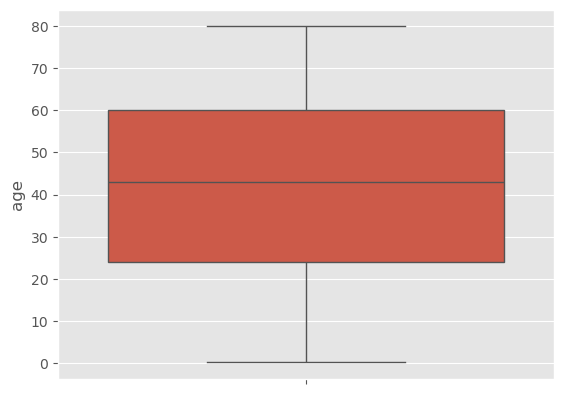

In [7]:
sns.boxplot(df["age"])

In [8]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [9]:
b=df.loc[df["age"]<3,["age","gender","blood_glucose_level","HbA1c_level","diabetes"]].sort_values(by="age",ascending=False)

In [10]:
b["diabetes"].unique()

array([0], dtype=int64)

In [11]:
df["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [12]:
df.loc[df["gender"]=="Other",["gender"]]

,gender
12669,Other
14838,Other
16702,Other
18691,Other
23266,Other
31985,Other
33805,Other
34929,Other
35006,Other
40337,Other


In [13]:
df.loc[df["gender"]=="Other",["gender"]]=np.nan

In [14]:
df.dropna(inplace=True)

In [15]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

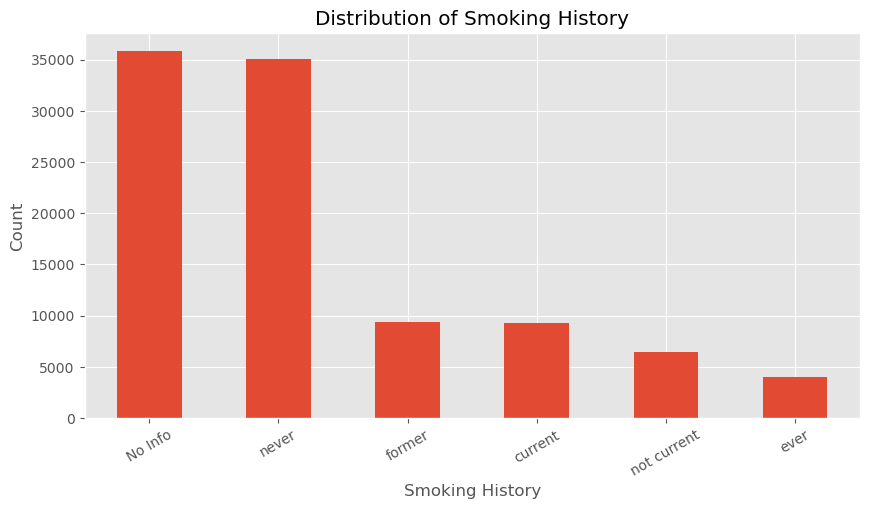

In [16]:
# ...existing code...
plt.figure(figsize=(10,5))
df["smoking_history"].value_counts().plot(kind='bar')
plt.xticks(rotation=30)
plt.xlabel("Smoking History")
plt.ylabel("Count")
plt.title("Distribution of Smoking History")
plt.show()


Text(0.5, 1.0, 'Distribution of gender')

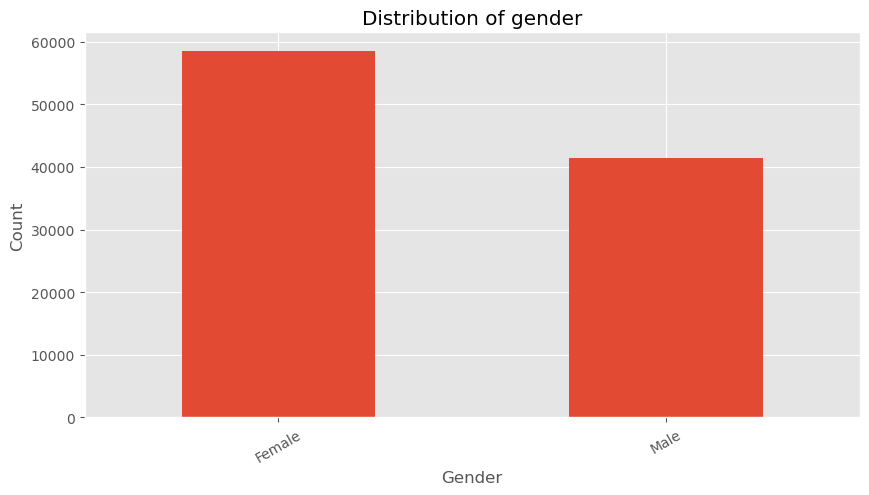

In [17]:
plt.figure(figsize=(10,5))
df["gender"].value_counts().plot(kind='bar')
plt.xticks(rotation=30)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of gender")

In [18]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

<Axes: >

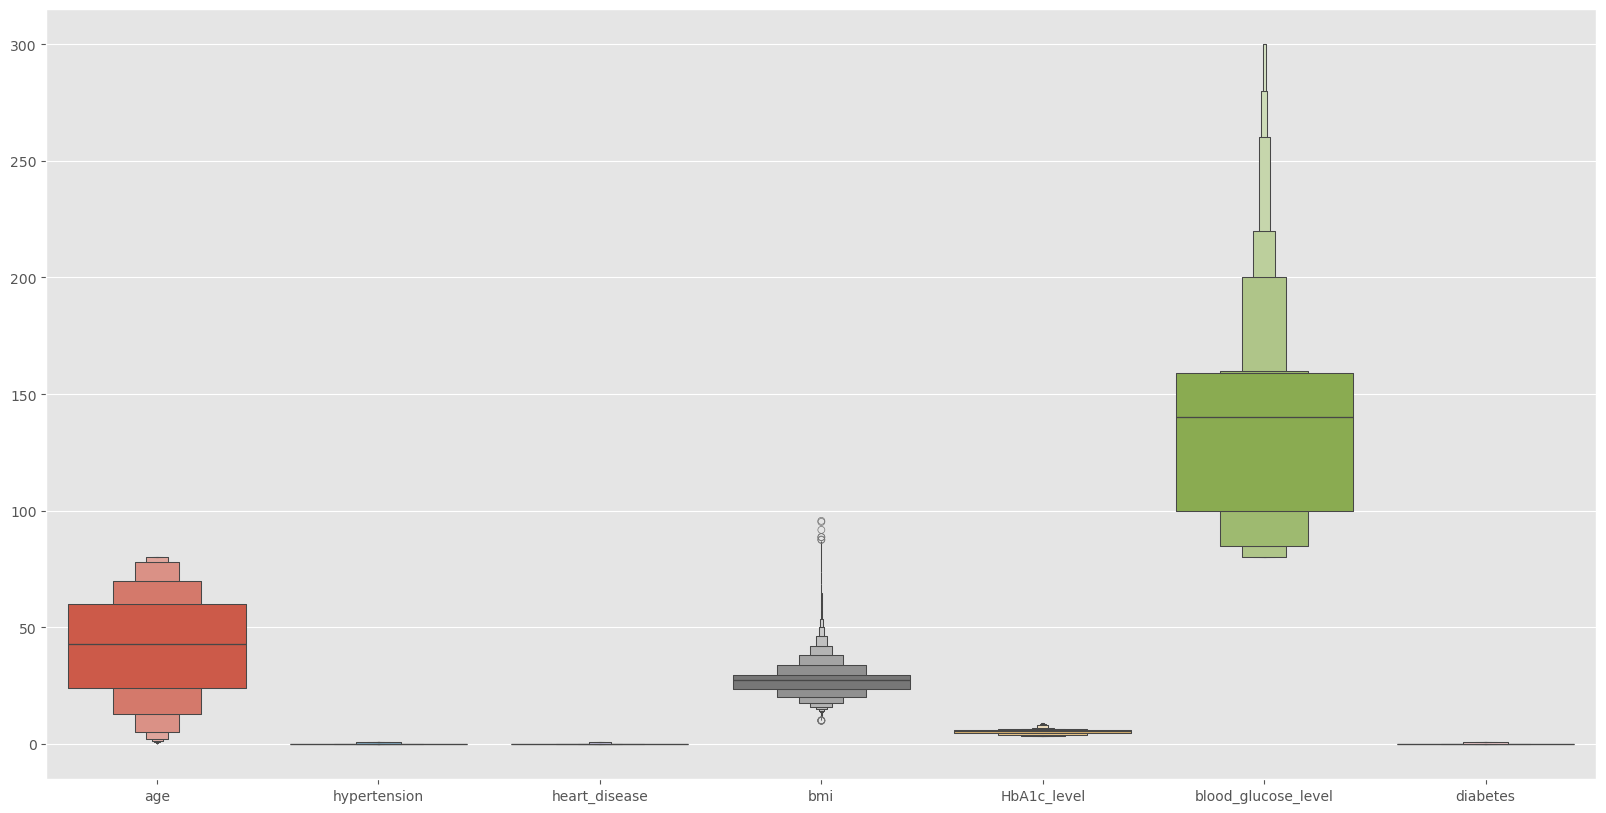

In [19]:
plt.figure(figsize=(20,10))
sns.boxenplot(df)

In [20]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

<Axes: xlabel='diabetes', ylabel='HbA1c_level'>

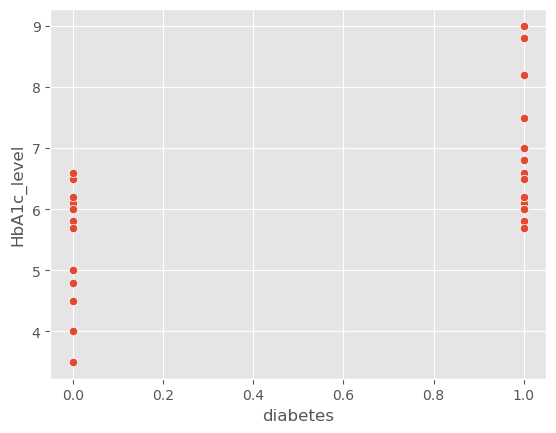

In [21]:
sns.scatterplot(x=df["diabetes"], y=df["HbA1c_level"])

<Axes: xlabel='diabetes', ylabel='blood_glucose_level'>

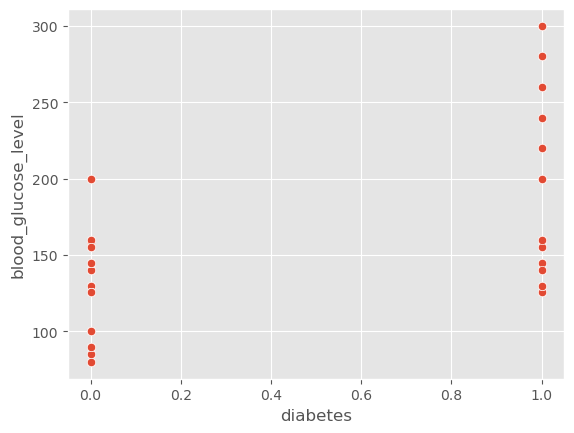

In [22]:
sns.scatterplot(x=df["diabetes"], y=df["blood_glucose_level"])

Text(0.5, 1.0, 'Diabetes by Gender')

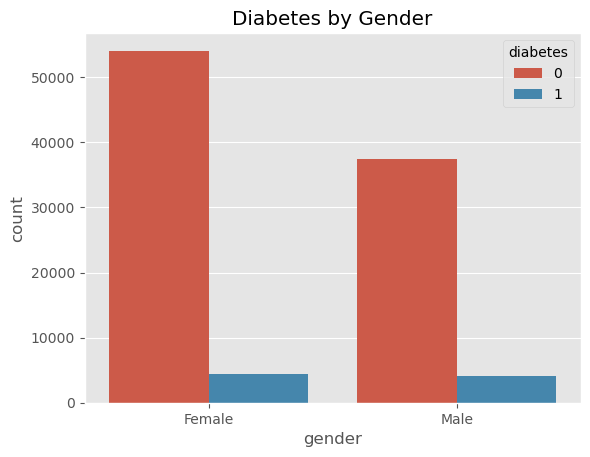

In [23]:
sns.countplot(x="gender", hue="diabetes", data=df)
plt.title("Diabetes by Gender")


In [24]:
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

<Axes: xlabel='hypertension', ylabel='count'>

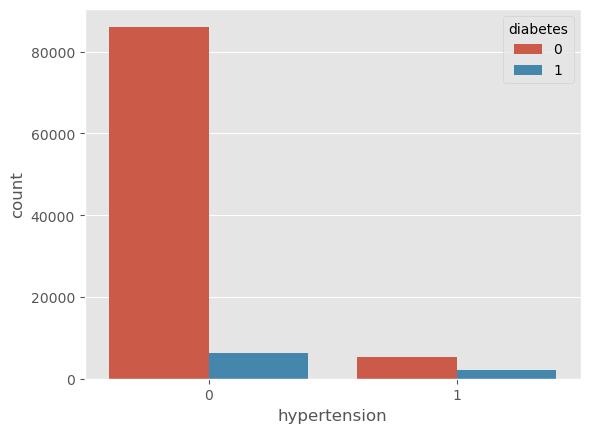

In [25]:
sns.countplot(x="hypertension", hue="diabetes", data=df)


<Axes: xlabel='heart_disease', ylabel='count'>

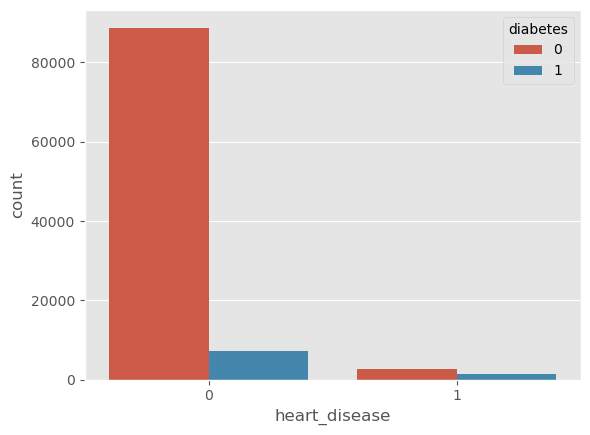

In [26]:
sns.countplot(x="heart_disease", hue="diabetes", data=df)


In [27]:
df.loc[df["diabetes"]==1,]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


Text(0.5, 1.0, 'Average HbA1c by Diabetes Status')

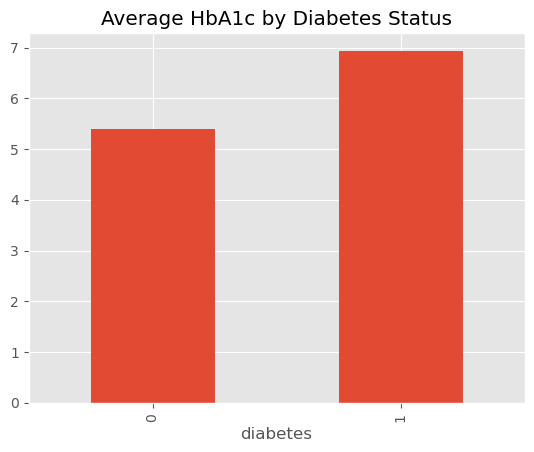

In [28]:
df.groupby("diabetes")["HbA1c_level"].mean().plot(kind="bar")
plt.title("Average HbA1c by Diabetes Status")


In [29]:
df["diabetes"].value_counts()

diabetes
0    91482
1     8500
Name: count, dtype: int64

In [30]:
91482/8500

10.762588235294118

Text(0.5, 1.0, 'Diabetes Class Distribution')

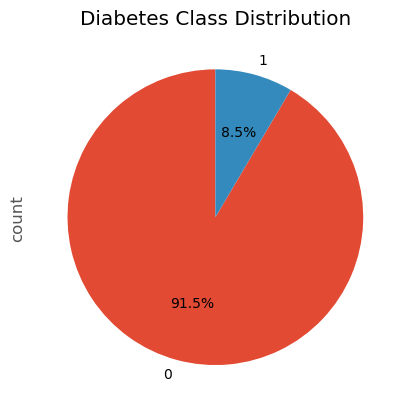

In [31]:
df["diabetes"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Diabetes Class Distribution")


In [32]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

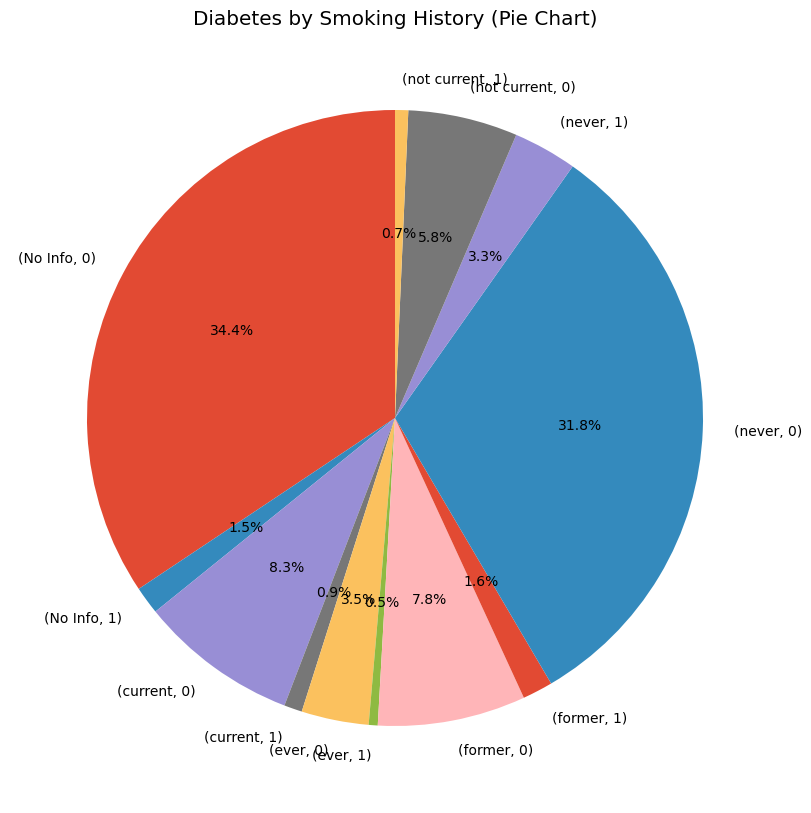

In [33]:
plt.figure(figsize=(10,10))
df.groupby(["smoking_history", "diabetes"]).size().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Diabetes by Smoking History (Pie Chart)")
plt.ylabel("")
plt.show()


<Axes: xlabel='age', ylabel='Count'>

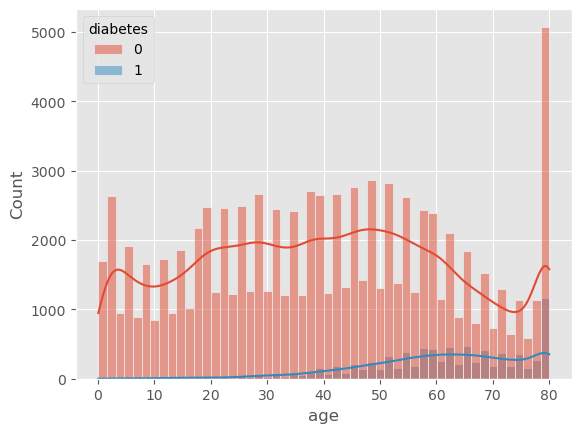

In [34]:
sns.histplot(data=df, x="age", hue="diabetes", kde=True)


In [35]:
df.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [36]:
df["gender"] = df["gender"].apply(lambda x: 1 if x == "Male" else 0)

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["smoking_history"] = le.fit_transform(df["smoking_history"])

In [38]:
import joblib

# حفظ الـ LabelEncoder
joblib.dump(le, "smoking_history_encoder.pkl")


['smoking_history_encoder.pkl']

<Axes: >

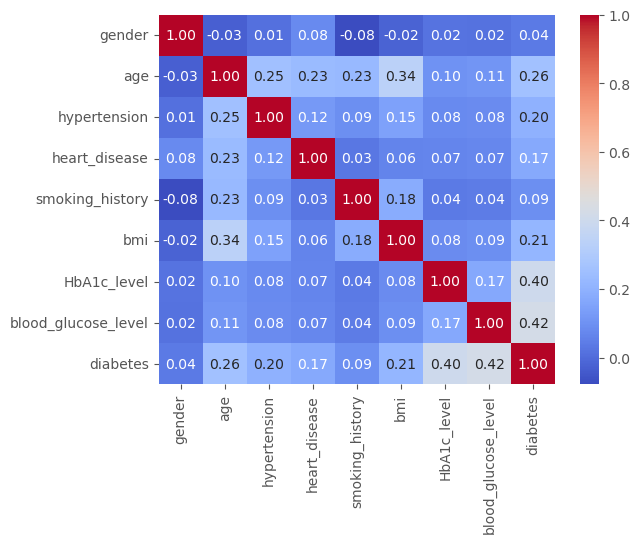

In [39]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')

In [40]:
x=df.drop(columns=["diabetes"])
y=df["diabetes"]

In [41]:
from sklearn.model_selection import train_test_split
x_trian,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
from imblearn.over_sampling import SMOTE
Model=LogisticRegression(class_weight="balanced")
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_trian, y_train)
Model.fit(x_trian, y_train)
y_pred_res = Model.predict(x_test)
print("Resampled Accuracy:", accuracy_score(y_test, y_pred_res))
print("Resampled Confusion Matrix:\n", confusion_matrix(y_test, y_pred_res))
print("Resampled Classification Report:\n", classification_report(y_test, y_pred_res))

c:\Users\nice\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Resampled Accuracy: 0.8769815472320848
Resampled Confusion Matrix:
 [[15987  2235]
 [  225  1550]]
Resampled Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93     18222
           1       0.41      0.87      0.56      1775

    accuracy                           0.88     19997
   macro avg       0.70      0.88      0.74     19997
weighted avg       0.93      0.88      0.90     19997



c:\Users\nice\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
from sklearn.tree import DecisionTreeClassifier
model2= DecisionTreeClassifier(class_weight="balanced")
model2.fit(x_trian, y_train)
y_pred2 = model2.predict(x_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred2))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred2))
print("roc_auc_score:",roc_auc_score(y_test, y_pred2))

Decision Tree Accuracy: 0.9542931439715957
Decision Tree Confusion Matrix:
 [[17769   453]
 [  461  1314]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     18222
           1       0.74      0.74      0.74      1775

    accuracy                           0.95     19997
   macro avg       0.86      0.86      0.86     19997
weighted avg       0.95      0.95      0.95     19997

roc_auc_score: 0.8577108154359149


In [44]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(class_weight="balanced")
model3.fit(X_res, y_res)
y_pred3=model3.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred3))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred3))
print("roc_auc_score:",roc_auc_score(y_test, y_pred3))

Random Forest Accuracy: 0.9578936840526079
Random Forest Confusion Matrix:
 [[17848   374]
 [  468  1307]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     18222
           1       0.78      0.74      0.76      1775

    accuracy                           0.96     19997
   macro avg       0.88      0.86      0.87     19997
weighted avg       0.96      0.96      0.96     19997

roc_auc_score: 0.8579066938123087


In [45]:
from xgboost import XGBClassifier
model4=XGBClassifier(scale_pos_weight=6.95,   
                    eval_metric='logloss',
                        random_state=42)
model4.fit(x_trian,y_train)
y_pred4=model4.predict(x_test)
print("xgboost Accuracy:", accuracy_score(y_test, y_pred4))
print("xgboost Confusion Matrix:\n", confusion_matrix(y_test, y_pred4))
print("xgboost Classification Report:\n", classification_report(y_test, y_pred4))
print("roc_auc_score:",roc_auc_score(y_test, y_pred4))


xgboost Accuracy: 0.9399409911486724
xgboost Confusion Matrix:
 [[17293   929]
 [  272  1503]]
xgboost Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97     18222
           1       0.62      0.85      0.71      1775

    accuracy                           0.94     19997
   macro avg       0.80      0.90      0.84     19997
weighted avg       0.95      0.94      0.94     19997

roc_auc_score: 0.8978891171637442


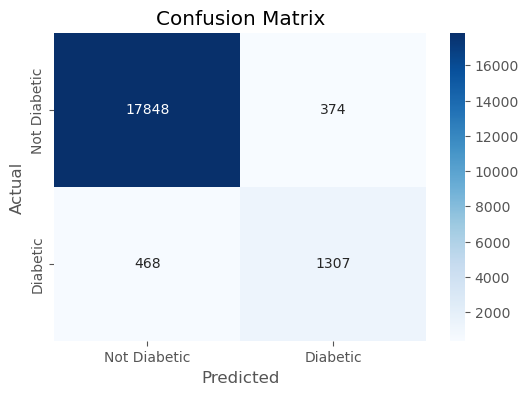

In [46]:
cm = confusion_matrix(y_test, y_pred3)

# رسمها كـ heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Diabetic', 'Diabetic'], yticklabels=['Not Diabetic', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

C:\Users\nice\AppData\Local\Temp\ipykernel_4024\3945395248.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette='Set2')


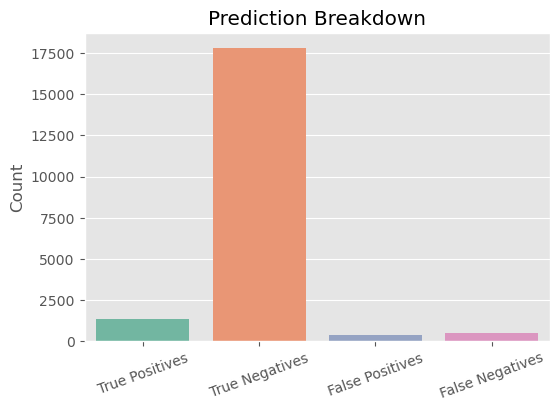

In [47]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

labels = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']
values = [TP, TN, FP, FN]

plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=values, palette='Set2')
plt.title("Prediction Breakdown")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.show()


In [48]:
import joblib
joblib.dump(model3, "diabetes_prediction_model.pkl", compress=3)


['diabetes_prediction_model.pkl']